## **Packages**

It is suggested to create a new enviroment. For example, see in: #https://geopandas.org/en/stable/getting_started/install.html
- Needed packages:
    - geopandas
    - rasterio
    - rioxarray
    - matplotlib
    - plotnine

In [2]:
import geopandas as gpd

#conda install -c conda-forge rasterio
import rasterio as rio

import rioxarray as rxr
import matplotlib.pyplot as plt

from rasterio.plot import show, show_hist
from shapely.geometry import mapping

#ggplot from R :) in python
from plotnine import *

## **Reading shape vector file (.shp) and raster file (.tif**)

In [3]:
# read Shape file. (ke) country name Kenia
ke_shp = gpd.read_file('ke_district_boundaries.shp')

# read tif file
wld_yld_path = './crops/suc_2010_yld.tif'
wld_yld = rxr.open_rasterio(wld_yld_path, masked=True).squeeze()

In [4]:
# view the attribute table associated with our shape file (geopandas)
ke_shp.head(5)

,DISTNAME,geometry
0,BARINGO,"POLYGON ((36.27934 0.62430, 36.29309 0.56918, ..."
1,BOMET,"POLYGON ((35.40041 -0.65199, 35.40092 -0.65389..."
2,BONDO,"MULTIPOLYGON (((34.26028 -0.34619, 34.25993 -0..."
3,BUNGOMA,"POLYGON ((34.37269 0.77008, 34.37254 0.77009, ..."
4,BURET,"POLYGON ((35.39652 -0.64162, 35.39649 -0.64188..."


(<matplotlib.collections.QuadMesh at 0x1e6d62aec20>, <AxesSubplot:>)

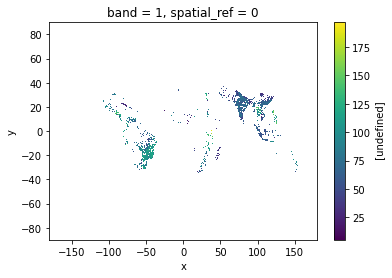

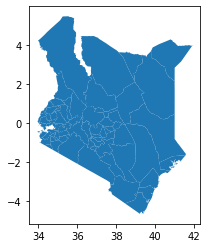

In [5]:
# basic plot
wld_yld.plot(), ke_shp.plot()

In [6]:
# view the coordinate reference system (CRS) of both of your datasets. Remember that in order to perform any analysis with these two datasets together, they will need to be in the same CRS.
print(ke_shp.crs)
print(wld_yld.rio.crs)

epsg:4326
EPSG:4326


## **Clipping**

Crop raster date with a shape file

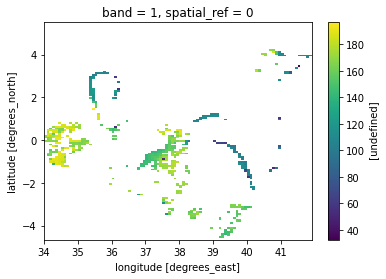

In [7]:
# Clipping
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/

ke_yld = wld_yld.rio.clip(ke_shp.geometry.apply(mapping), ke_shp.crs)
ke_yld.plot()

### Data distribution

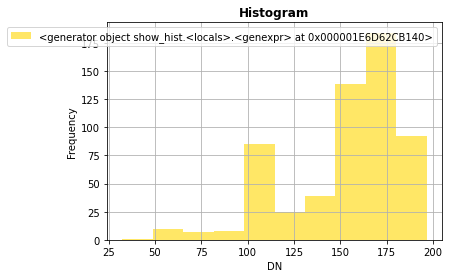

In [8]:
# distribution of data
show_hist(ke_yld.to_numpy(), bins=10, lw=0, stacked=False, alpha=0.6)

# another way with raster....
#https://rasterframes.io/raster-write.html

## **Plot**

### Plot using Matplotlib

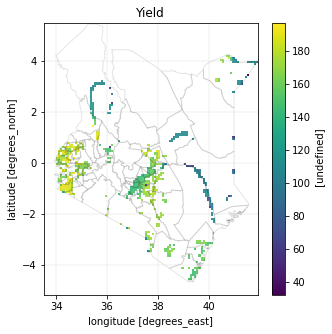

In [9]:
#plot
f, ax = plt.subplots(figsize=(5,5))
#tiff
ke_yld.plot.imshow(ax=ax)
#shp
ke_shp.plot(ax=ax, alpha=.1, edgecolor='black', facecolor='white')
ax.set(title="Yield")
ax.set_axis_on()
ax.grid(linestyle='--', linewidth='0.25')
plt.show()
f.savefig('ke_yld.jpg', dpi=600)

### Plot using plotnine or ggplot "The Grammar of Graphics" :)  for python

C:\Users\rdhf\AppData\Local\Continuum\miniconda3\envs\geo_env\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
C:\Users\rdhf\AppData\Local\Continuum\miniconda3\envs\geo_env\lib\site-packages\descartes\patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.


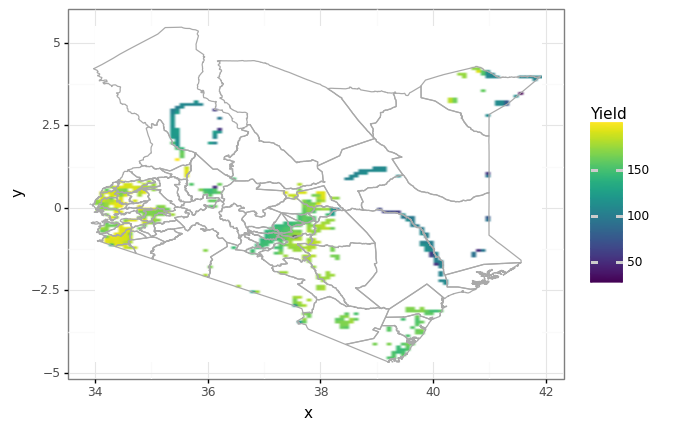

<ggplot: (130685488777)>

In [10]:
ke = (ggplot()
    + geom_raster((ke_yld.to_dataframe('Yield').reset_index()), aes(x='x', y='y', fill='Yield'))
    + geom_map(ke_shp, color='darkgrey', fill='none', alpha=.5)
    + scale_fill_cmap(cmap_name='viridis', na_value="white")
    + scale_y_continuous()
    + theme(figure_size=(2/2.54, 7/2.54))
    + theme_bw())
ke

#ke.save('ke_yld.svg')

## **Exporting**
1. Clipped raster file to a new .tif file.
2. Data frame as csv file.

### Clipped raster file

In [11]:
#export the clipped raster
path = './crops/ke_yld.tif' # write the name of the clipped raster image
ke_yld.rio.to_raster(path, driver='Gtiff')

### CSV file

In [12]:
ke_yld_txt = ke_yld.to_dataframe('Yield') #must give a name to the list "Yield"
ke_yld_txt = ke_yld_txt[ke_yld_txt['Yield']>0].reset_index()            #erase empty rows with zero values.

In [13]:
# save to csv
ke_yld_txt.to_csv('ke_yld_txt.csv') # add the name for the data, for